In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

밀도 기반 클러스터링(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)  
밀도 기반 클러스터링은 데이터의 공간을 다루는 알고리즘으로 밀도 기반 클러스터링은 전체 공간에서 데이터가 가장 밀집된 영역을 찾는다. 그 밀집된 영역이 하나의 클러스터가 되며, 밀집 정도가 낮은 영역을 클러스터 외부 영역으로 구분한다. 이때, 밀집 정도를 파악하기 위해 데이터 포인트간 거리를 측정하게 되는데, 거리를 어떤 방법으로 측정하느냐에 따라 클러스터링 형태가 달라진다.

밀도 기반 클러스터링에서 거리 측정 방법은 DBSCAN 객체를 생성할 때 조절 가능하며, 기본값은 유클리드 거리를 사용한다. 밀도 기반 클러스터링은 클러스터 개수를 사전에 정하지 않아도 된다는 장점이 있다.

밀도 기반 클러스터링의 핵심 아이디어는 일정 반경 내에 최소한의 데이터 포인트 개수 이상이 존재한다는 것으로 반경과 최소한의 데이터 포인트 개수가 밀도 기반 클러스터링의 필수 요소이다.  

밀도 기반 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링해 본다. 

In [3]:
# 데이터 생성
# make_moons 함수는 초승달 모양의 클러스터 두 개 형상의 데이터를 생성한다. make_moons 함수로 만든 데이터는 직선을
# 사용하여 분류할 수 없다.
from sklearn import datasets # 클러스터링용 가상 데이터를 사용하기 위해 import 한다.
# n_samples 옵션은 전체 데이터의 개수이며, noise 옵션으로 데이터가 흩어지는 정도를 지정한다.
X, y = datasets.make_moons(n_samples=300, noise=0.05, random_state=0) # make_moons 함수로 클러스터링용 가상 데이터를 만든다.
print(X.shape, y.shape)

(300, 2) (300,)


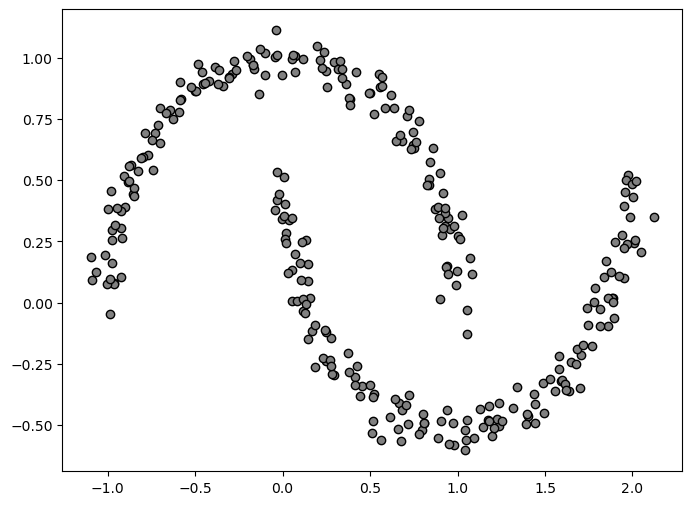

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(X[:,0],X[:,1],c='gray',edgecolors='black',marker='o')
plt.show()

In [7]:
# 밀도 기반 클러스터링 모델 생성 후 데이터 학습
from sklearn.cluster import DBSCAN # 밀도 기반 클러스터링을 사용하기 위해 import 한다. 